# E-commerce Machine Learning


In [2]:
import pandas as pd
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Spark Session Initiate

In [3]:
spark = SparkSession.builder.master('local[6]')\
                            .appName('ecommerce')\
                            .getOrCreate()
spark

In [4]:
# spark.stop()

## Load Dataset
Source : [Pakistan E-commerce Dataset](https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset/data)

In [5]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType

In [6]:
# define dataframe schema
schema = StructType([
    StructField('item_id', IntegerType(), True),
    StructField('status', StringType(), True),
    StructField('created_at', StringType(), True),
    StructField('sku', StringType(), True),
    StructField('price', FloatType(), True),
    StructField('qty_ordered', IntegerType(), True),
    StructField('grand_total', FloatType(), True),
    StructField('increment_id', IntegerType(), True),
    StructField('category_name_1', StringType(), True),
    StructField('sales_commission_code', StringType(), True),
    StructField('discount_amount', FloatType(), True),
    StructField('payment_method', StringType(), True),
    StructField('working_date', StringType(), True),
    StructField('BI Status', StringType(), True),
    StructField(' MV', StringType(), True),
    StructField('Year', StringType(), True),
    StructField('Month', StringType(), True),
    StructField('Customer Since', StringType(), True),
    StructField('M-Y', StringType(), True),
    StructField('F-Y', StringType(), True),
    StructField('Customer ID', StringType(), True),
    # ignore last 5 column data because it's empty column
])

In [7]:
# tmp = pd.read_csv('./dataset/Pakistan Largest Ecommerce Dataset.csv')
# tmp.info()

In [8]:
df = spark.read.csv('./dataset/Pakistan Largest Ecommerce Dataset.csv', header=True, schema=schema)
df.printSchema()
df.show(5)

root
 |-- item_id: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- sku: string (nullable = true)
 |-- price: float (nullable = true)
 |-- qty_ordered: integer (nullable = true)
 |-- grand_total: float (nullable = true)
 |-- increment_id: integer (nullable = true)
 |-- category_name_1: string (nullable = true)
 |-- sales_commission_code: string (nullable = true)
 |-- discount_amount: float (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- working_date: string (nullable = true)
 |-- BI Status: string (nullable = true)
 |--  MV: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Customer Since: string (nullable = true)
 |-- M-Y: string (nullable = true)
 |-- F-Y: string (nullable = true)
 |-- Customer ID: string (nullable = true)

+-------+--------------+----------+--------------------+------+-----------+-----------+------------+-----------------+----------

In [9]:
df.toPandas().describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
item_id,584524.0,NaN,NaN,NaN,565667.074218,200121.173648,211131.0,395000.75,568424.5,739106.25,905208.0
status,584520,19,complete,233685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,584535,790,11/25/2016,15169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sku,584515,84897,MATSAM59DB75ADB2F80,3775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,584524.0,NaN,NaN,NaN,8236.0625,435291.6875,0.0,360.0,899.0,4070.0,100348152.0
qty_ordered,584513.0,NaN,NaN,NaN,1.296394,3.996098,1.0,1.0,1.0,1.0,1000.0
grand_total,584513.0,NaN,NaN,NaN,8530.706055,61321.390625,-1594.0,945.0,1960.199951,6999.0,17888000.0
increment_id,584512.0,NaN,NaN,NaN,100355601.703919,388757.583304,0.0,100264561.75,100351163.5,100450243.25,100562387.0
category_name_1,584360,18,Mobiles & Tablets,115710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_commission_code,447353,7236,\N,338990,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print('shape of df:', (df.count(), len(df.columns)))

shape of df: (1048586, 21)


In [11]:
# df.toPandas().info()

## Preprocessing Data

In [12]:
import pyspark.sql.functions as F

### Drop Unused Columns
Dropping columns that will not be use because its redundant / unclear information

In [13]:
df = df.drop('working_date','sales_commission_code',' MV','F-Y','M-Y','Year','Month','increment_id','sku')
print('shape of df:', (df.count(), len(df.columns)))

shape of df: (1048586, 12)


### Rename Columns

In [14]:
df = df.withColumnsRenamed({'category_name_1':'category', 'BI Status':'bi_status', 'Customer ID':'customer_id', 'Customer Since': 'customer_since'})
df.columns

['item_id',
 'status',
 'created_at',
 'price',
 'qty_ordered',
 'grand_total',
 'category',
 'discount_amount',
 'payment_method',
 'bi_status',
 'customer_since',
 'customer_id']

### Handle Null Value 

In [15]:
for c in df.columns: print(f'NULL in {c}',df.filter(f'{c} IS NULL').count()) 

NULL in item_id 464062
NULL in status 464066
NULL in created_at 464051
NULL in price 464062
NULL in qty_ordered 464073
NULL in grand_total 464073
NULL in category 464226
NULL in discount_amount 464073
NULL in payment_method 464062
NULL in bi_status 464062
NULL in customer_since 464062
NULL in customer_id 464073


In [16]:
df.filter('customer_id IS NULL').show(10)

+-------+--------+----------+------------+-----------+-----------+--------+---------------+--------------+---------+--------------+-----------+
|item_id|  status|created_at|       price|qty_ordered|grand_total|category|discount_amount|payment_method|bi_status|customer_since|customer_id|
+-------+--------+----------+------------+-----------+-----------+--------+---------------+--------------+---------+--------------+-----------+
| 217788|complete| 7/24/2016|        NULL|       NULL|       NULL|    NULL|           NULL|          NULL|     NULL|          NULL|       NULL|
|   NULL|    2660|         1|1.00152216E8|       NULL|       NULL|     cod|           NULL|        2,660 |        7|          1806|       NULL|
| 424131|complete| 3/18/2017|        NULL|       NULL|       NULL|    NULL|           NULL|          NULL|     NULL|          NULL|       NULL|
|   NULL|     999|         1| 1.0028058E8|       NULL|       NULL|     cod|           NULL|          999 |        3|         31987|     

a lot of rows are empty or have invalid value, we can see that mostly it's because there is no valid customer data (i.e customer_id). So we will drop these invalid rows.

In [17]:
df = df.na.drop(subset=['customer_id','status']) # drop rows by status to make sure all data have transaction status

In [18]:
df.count()

584498

In [19]:
# re-check remaining missing value in columns
for c in df.columns: print(f'NULL in {c}',df.filter(f'{c} IS NULL').count()) 

NULL in item_id 0
NULL in status 0
NULL in created_at 0
NULL in price 0
NULL in qty_ordered 0
NULL in grand_total 0
NULL in category 164
NULL in discount_amount 0
NULL in payment_method 0
NULL in bi_status 0
NULL in customer_since 0
NULL in customer_id 0


as we can see the only category column have null value. First let's check if we able to fill the null value from non-null same item_id  

In [20]:
# handle null category data
tmp = df.filter('category IS NULL').select('item_id').collect()
tmp = [int(row['item_id']) for row in tmp]

In [21]:
tmp1 = df.filter(df.item_id.isin(tmp))
tmp1.groupBy('item_id').count().orderBy('count', ascending=False).show(30)

+-------+-----+
|item_id|count|
+-------+-----+
| 757685|    1|
| 731122|    1|
| 732569|    1|
| 733363|    1|
| 733727|    1|
| 737199|    1|
| 744922|    1|
| 725194|    1|
| 737219|    1|
| 732578|    1|
| 733736|    1|
| 744351|    1|
| 757605|    1|
| 732575|    1|
| 732572|    1|
| 733367|    1|
| 733741|    1|
| 829983|    1|
| 830138|    1|
| 829959|    1|
| 830090|    1|
| 833708|    1|
| 829957|    1|
| 830102|    1|
| 768018|    1|
| 833704|    1|
| 830037|    1|
| 830009|    1|
| 830033|    1|
| 829961|    1|
+-------+-----+
only showing top 30 rows



because there is no other data with same item_id to category null dataframe. We can't fill the category value. So, for now we will drop all rows with invalid category 

In [22]:
print('before drop invalid category value :', df.count())
df = df.na.drop(subset=['category'])
print('after drop invalid category value :', df.count())

before drop invalid category value : 584498
after drop invalid category value : 584334


In [23]:
# re-check remaining missing value in columns
for c in df.columns: print(f'NULL in {c}',df.filter(f'{c} IS NULL').count()) 

NULL in item_id 0
NULL in status 0
NULL in created_at 0
NULL in price 0
NULL in qty_ordered 0
NULL in grand_total 0
NULL in category 0
NULL in discount_amount 0
NULL in payment_method 0
NULL in bi_status 0
NULL in customer_since 0
NULL in customer_id 0


### Enhance Data Quality

now we need to check non-null value in categorical data that refer to invalid value

let's check categorical data's unique value to make sure the value is correct

In [24]:
df.select('status').distinct().show()
df.select('bi_status').distinct().show()
df.select('payment_method').distinct().show()
df.select('category').distinct().show()

+--------------+
|        status|
+--------------+
|      received|
|        holded|
|      canceled|
|        refund|
|      exchange|
|        closed|
|order_refunded|
|         fraud|
|      complete|
|          paid|
|pending_paypal|
|           cod|
|            \N|
|       pending|
|    processing|
|payment_review|
+--------------+

+---------+
|bi_status|
+---------+
|    #REF!|
|    Gross|
|      Net|
|    Valid|
+---------+

+-----------------+
|   payment_method|
+-----------------+
|              cod|
|  internetbanking|
|          mcblite|
| marketingexpense|
|       jazzwallet|
|        mygateway|
|   customercredit|
|          Payaxis|
|financesettlement|
|      jazzvoucher|
|    ublcreditcard|
|    productcredit|
|   cashatdoorstep|
|       Easypay_MA|
|  easypay_voucher|
|          Easypay|
|      bankalfalah|
|              apg|
+-----------------+

+------------------+
|          category|
+------------------+
|School & Education|
|       Kids & Baby|
|     Entertainm

### RECHECK>>DROP ONLY STATUS=='\N', cat and bi_status must fill

In [25]:
# remove '\N' from status and category column, remove '#REF!' from bi_status
print('before drop invalid category value :', df.count())
df = df.filter((df.status !='\\N') & (df.category !='\\N') & (df.bi_status != '#REF!'))
print('after drop invalid category value :', df.count())

before drop invalid category value : 584334
after drop invalid category value : 576483


In [26]:
df.groupBy('status').count().orderBy('count', ascending=False).show()

+--------------+------+
|        status| count|
+--------------+------+
|      complete|230451|
|      canceled|197974|
|      received| 77150|
|order_refunded| 58343|
|        refund|  7876|
|           cod|  2851|
|          paid|  1156|
|        closed|   492|
|payment_review|    57|
|       pending|    48|
|    processing|    33|
|        holded|    31|
|         fraud|    10|
|pending_paypal|     7|
|      exchange|     4|
+--------------+------+



we can see from status column unique values above that the category is too specific and unorganized.<br>
We can make it more general and simple by grouping the status into payment_status with 3 category, that is pass, pending, and fraud

In [27]:
# define status name will be under payment_status: pass
pass_stat = ['complete','canceled','received','order_refunded','refund','paid','closed','exchange']
# define status name will be under payment_status: pending
pend_stat = ['cod','payment_review','pending','processing','holded','pending_paypal']
# other that will be classified with payment_status: fraud

In [28]:
df = df.withColumn('payment_status', F.when(F.col('status').isin(pass_stat),'pass')\
                                    .when(F.col('status').isin(pend_stat),'pending')\
                                    .otherwise('fraud')
                    )

In [29]:
df.groupBy('status','payment_status').count().orderBy('count', ascending=False).show()

+--------------+--------------+------+
|        status|payment_status| count|
+--------------+--------------+------+
|      complete|          pass|230451|
|      canceled|          pass|197974|
|      received|          pass| 77150|
|order_refunded|          pass| 58343|
|        refund|          pass|  7876|
|           cod|       pending|  2851|
|          paid|          pass|  1156|
|        closed|          pass|   492|
|payment_review|       pending|    57|
|       pending|       pending|    48|
|    processing|       pending|    33|
|        holded|       pending|    31|
|         fraud|         fraud|    10|
|pending_paypal|       pending|     7|
|      exchange|          pass|     4|
+--------------+--------------+------+



now we move to discount columns, this columns contain mostly zero and redundant because real info is in grand total. So instead delete this column, we can change it to caetgorical column that contain is item discounted or not

In [30]:
df = df.withColumn('is_discounted', (F.col('discount_amount') > 0).cast('int'))
df = df.drop('discount_amount')

In [31]:
df.groupBy('is_discounted').count().show()

+-------------+------+
|is_discounted| count|
+-------------+------+
|            1|206085|
|            0|370398|
+-------------+------+



### Drop Duplicate Data

In [32]:
print('before drop invalid category value :', df.count())
df = df.drop_duplicates()
print('after drop invalid category value :', df.count())

before drop invalid category value : 576483
after drop invalid category value : 576483


### Outlier Handle (unfinish)

In [33]:
df.select('status','price','qty_ordered','is_discounted','grand_total').show(15)

+--------------+------+-----------+-------------+-----------+
|        status| price|qty_ordered|is_discounted|grand_total|
+--------------+------+-----------+-------------+-----------+
|      complete| 120.0|          1|            0|      360.0|
|      complete|6240.0|          1|            0|        0.0|
|order_refunded|6700.0|          1|            0|     6700.0|
|      complete|  90.0|          1|            0|       90.0|
|      complete| 250.0|          1|            0|      250.0|
|      complete| 140.0|          1|            0|      140.0|
|      canceled|2200.0|          1|            0|     2200.0|
|      complete| 690.0|          1|            0|     1380.0|
|      complete| 950.0|          1|            0|     1170.0|
|      complete| 700.0|          1|            0|      700.0|
|      complete|1765.0|          1|            0|     1765.0|
|order_refunded| 360.0|          1|            0|      360.0|
|      complete| 260.0|          1|            0|      600.0|
|      c

as you can see from table above price, qty, and discount have different result to grand total. We don't know is there any external factor that affect the grand total or not, but for now due to unclear relation between them we only filter by grand total <br><br>
note: for classification problem, we will keep outlier from data with payment_status='fraud'

In [34]:
# keep data with payment_status is fraud
tmp2 = df.filter(df.payment_status=='fraud')

In [35]:
def outlier_treatment(dataframe, listCol):
    # calc q1, q3, and lower and upper bound for each col in listCol
    q = dataframe.approxQuantile(listCol, [0.25,0.75], 1e-2)
    lower_bound = [float(quan[0] - 1.5 * (quan[1]-quan[0])) for quan in q]
    upper_bound = [float(quan[1] + 1.5 * (quan[1]-quan[0])) for quan in q]

    print(lower_bound, upper_bound)

    # filter outliers and update the DataFrame
    print('before removing outlier :', dataframe.count())
    for i, col in enumerate(listCol):
        dataframe = dataframe.filter(((F.col(col) >= lower_bound[i]) & (F.col(col) <= upper_bound[i])))
    print('after removing outlier :', dataframe.count())
    
    return dataframe

In [36]:
df.select('price','qty_ordered','grand_total').toPandas().describe().T

,count,mean,std,min,25%,50%,75%,max
price,576483.0,6380.660645,15006.904297,0.0,360.000000,900.000000,4054.000000,1.012626e+06
qty_ordered,576483.0,1.295216,3.997737,1.0,1.000000,1.000000,1.000000,1.000000e+03
grand_total,576483.0,8586.783203,61731.695312,-1594.0,952.100006,1986.455444,6998.399902,1.788800e+07


In [37]:
df.toPandas().describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
item_id,576483.0,NaN,NaN,NaN,568863.306573,199132.941748,211133.0,400808.0,572637.0,741165.5,905208.0
status,576483,15,complete,230451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,576483,789,11/25/2016,14929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,576483.0,NaN,NaN,NaN,6380.660645,15006.904297,0.0,360.0,900.0,4054.0,1012625.875
qty_ordered,576483.0,NaN,NaN,NaN,1.295216,3.997737,1.0,1.0,1.0,1.0,1000.0
grand_total,576483.0,NaN,NaN,NaN,8586.783203,61731.695312,-1594.0,952.100006,1986.455444,6998.399902,17888000.0
category,576483,15,Mobiles & Tablets,115709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,576483,18,cod,267762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bi_status,576483,3,Net,230943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_since,576483,27,2016-11,80888,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.filter(df.payment_status=='fraud').show()

+-------+------+----------+--------+-----------+-----------+-----------------+--------------+---------+--------------+-----------+--------------+-------------+
|item_id|status|created_at|   price|qty_ordered|grand_total|         category|payment_method|bi_status|customer_since|customer_id|payment_status|is_discounted|
+-------+------+----------+--------+-----------+-----------+-----------------+--------------+---------+--------------+-----------+--------------+-------------+
| 232984| fraud| 8/22/2016| 86250.0|          1|    86250.0|    Entertainment| ublcreditcard|    Gross|        2016-8|       4581|         fraud|            0|
| 264615| fraud|10/18/2016|120000.0|          1|   120000.0|    Home & Living|       Payaxis|    Gross|        2016-7|        751|         fraud|            0|
| 390474| fraud| 1/18/2017| 19999.0|          1|    19999.0|Mobiles & Tablets|       Payaxis|    Gross|        2017-1|      30412|         fraud|            0|
| 376659| fraud|12/27/2016| 83770.0|    

In [39]:
df = outlier_treatment(df, ['grand_total'])
# concat with fraud df
df = df.union(tmp2)

[-7757.400146484375] [15453.000244140625]
before removing outlier : 576483
after removing outlier : 495650


### Data Type Check

In [43]:
df = df.withColumn('created_at', F.to_date(F.unix_timestamp('created_at', 'M/d/y').cast('timestamp')))
df = df.withColumn('customer_since', F.to_date(F.unix_timestamp('customer_since', 'y-M').cast('timestamp')))

In [44]:
# re-check remaining missing value in columns
for c in['created_at','customer_since']: print(f'NULL in {c}',df.filter(f'{c} IS NULL').count()) 

NULL in created_at 0
NULL in customer_since 9


In [45]:
# fill null customer_since with mode
mode_value = df.groupBy('customer_since').count().orderBy('count', ascending=False).first()[0]
df = df.withColumn('customer_since', F.when(df.customer_since.isNull(), F.lit(mode_value)).otherwise(F.col('customer_since')))

In [46]:
df.printSchema()

root
 |-- item_id: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- created_at: date (nullable = true)
 |-- price: float (nullable = true)
 |-- qty_ordered: integer (nullable = true)
 |-- grand_total: float (nullable = true)
 |-- category: string (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- bi_status: string (nullable = true)
 |-- customer_since: date (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- payment_status: string (nullable = false)
 |-- is_discounted: integer (nullable = true)



## EDA

### Summary of Dataset

In [47]:
df.toPandas().describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
item_id,495660.0,NaN,NaN,NaN,558929.026542,197487.317775,211133.0,391140.5,558221.5,727050.5,905204.0
status,495660,15,complete,211592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,495660,789,2016-11-25,13729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,495660.0,NaN,NaN,NaN,2178.3125,3933.878174,0.0,320.0,723.0,1750.0,163000.0
qty_ordered,495660.0,NaN,NaN,NaN,1.282476,2.209675,1.0,1.0,1.0,1.0,500.0
grand_total,495660.0,NaN,NaN,NaN,2975.317383,3475.151123,-1594.0,830.0,1500.0,3683.550049,120000.0
category,495660,15,Men's Fashion,90949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,495660,18,cod,253255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bi_status,495660,3,Net,212028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_since,495660,26,2016-11-01,74285,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
print('dataset shape :', (df.count(), len(df.columns)))

dataset shape : (495660, 13)


### Data Distribution

In [49]:
df.printSchema()

root
 |-- item_id: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- created_at: date (nullable = true)
 |-- price: float (nullable = true)
 |-- qty_ordered: integer (nullable = true)
 |-- grand_total: float (nullable = true)
 |-- category: string (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- bi_status: string (nullable = true)
 |-- customer_since: date (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- payment_status: string (nullable = false)
 |-- is_discounted: integer (nullable = true)



#### Numerical Data Distribution

In [50]:
tmp = df.select('qty_ordered','price','grand_total').toPandas()

In [51]:
tmp = np.log(tmp) # scale data with log for better viz result
# tmp

c:\Users\dendy\miniconda3\envs\airflow\lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\dendy\miniconda3\envs\airflow\lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


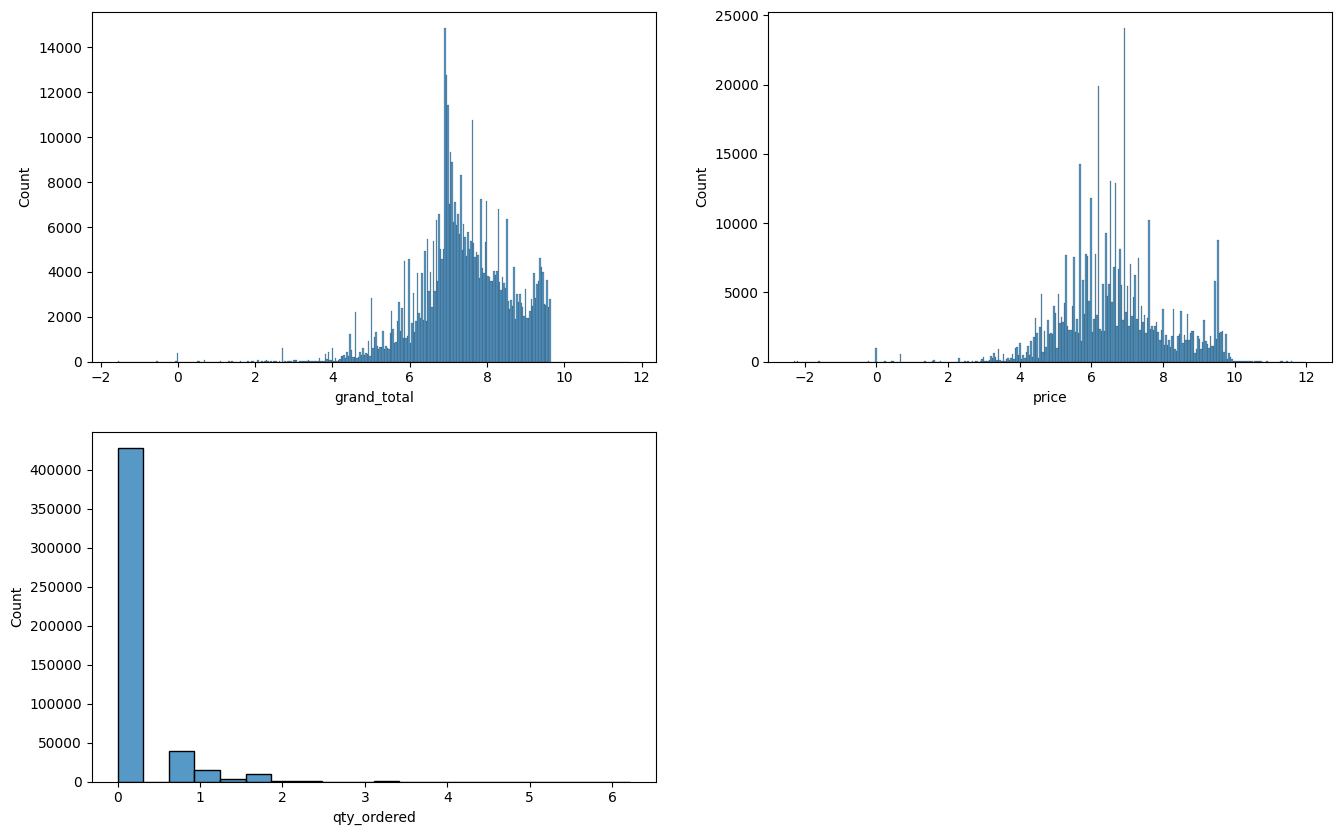

In [52]:
f, ax = plt.subplots(2,2, figsize=(16,10))
sns.histplot(tmp['grand_total'], ax=ax[0,0])#, kde=True)
sns.histplot(tmp['price'], ax=ax[0,1])#, kde=True)
sns.histplot(tmp['qty_ordered'], ax=ax[1,0])#, kde=True)
ax[1, 1].axis('off')
plt.show()


#### Categorical Data Visualization

In [53]:
tmp = df.select('created_at','status','payment_status','category','payment_method','bi_status','is_discounted').toPandas()

In [54]:
tmp.payment_status.value_counts()

payment_status
pass       492825
pending      2825
fraud          10
Name: count, dtype: int64

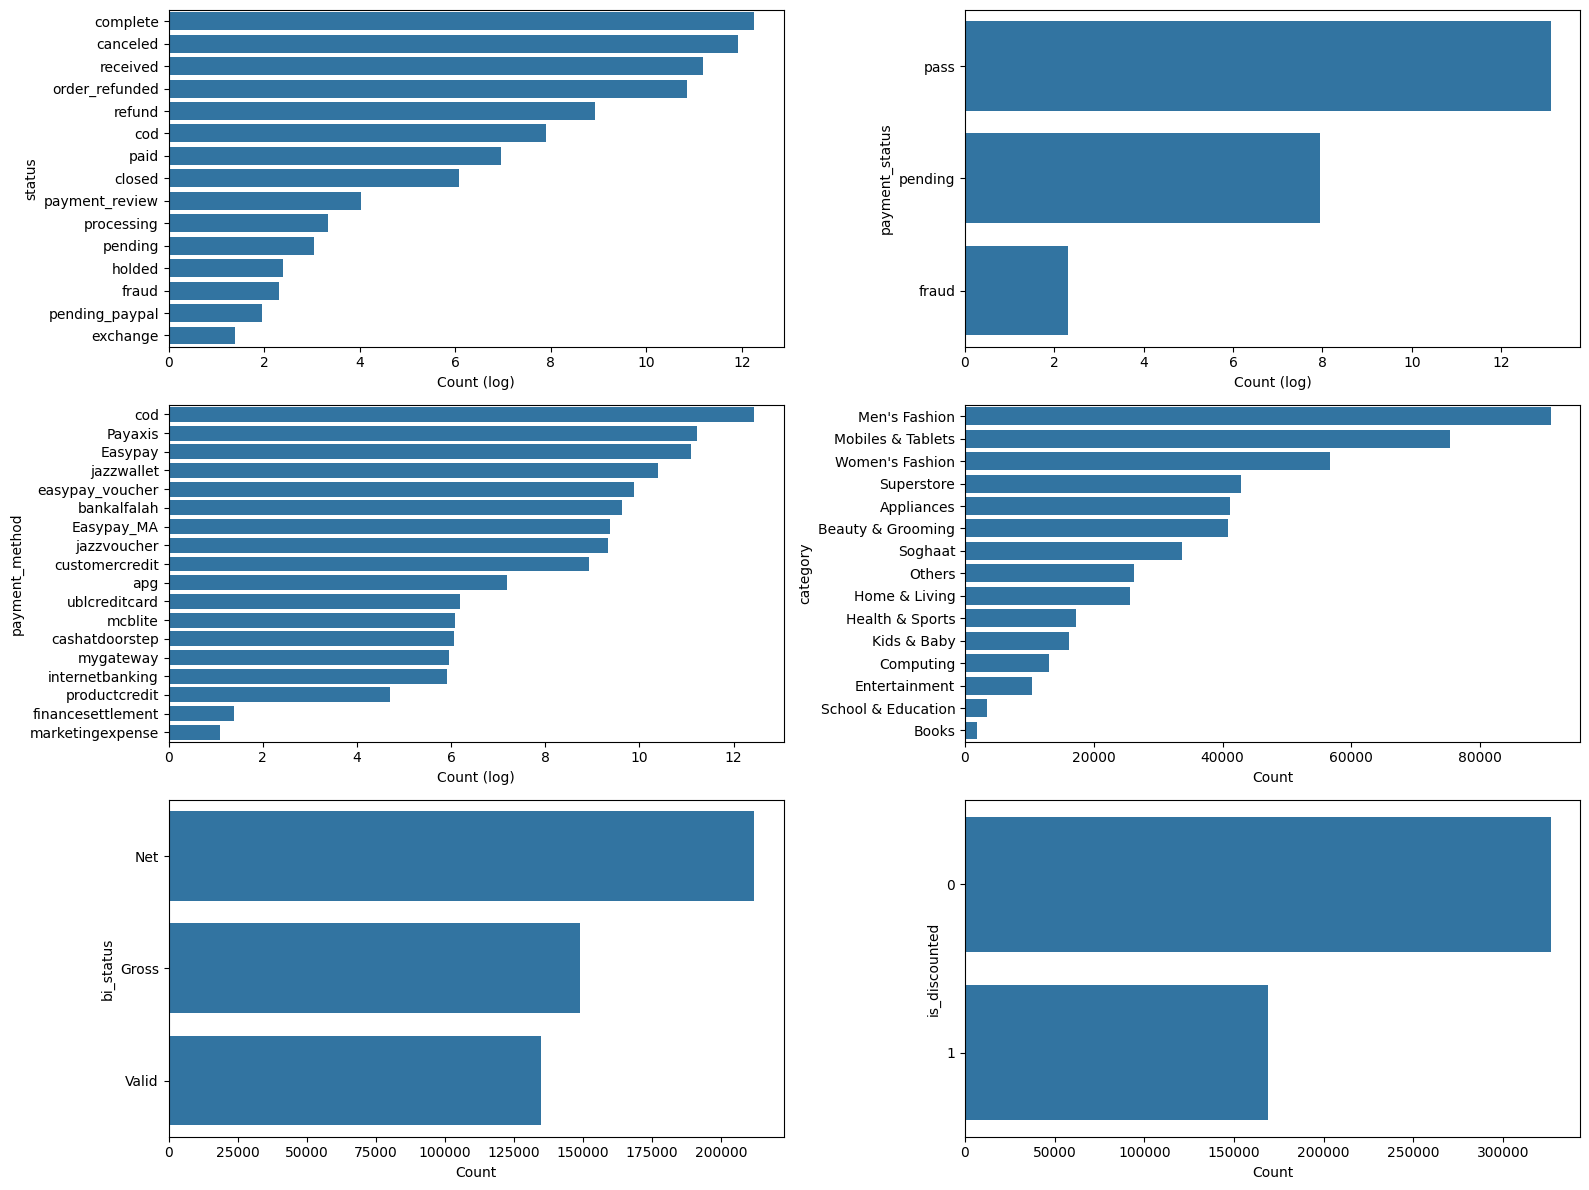

In [55]:
f, ax = plt.subplots(3,2, figsize=(16,12))
tmp1 = tmp.status.value_counts()
ax[0,0] = sns.barplot(x=np.log(tmp1.values), y=tmp1.index, orient='h', ax=ax[0,0])
ax[0,0].set_xlabel('Count (log)')
tmp1 = tmp.payment_status.value_counts()
ax[0,1] = sns.barplot(x=np.log(tmp1.values), y=tmp1.index, orient='h', ax=ax[0,1])
ax[0,1].set_xlabel('Count (log)')
tmp1 = tmp.payment_method.value_counts()
ax[1,0] = sns.barplot(x=np.log(tmp1.values), y=tmp1.index, orient='h', ax=ax[1,0])
ax[1,0].set_xlabel('Count (log)')
tmp1 = tmp.category.value_counts()
ax[1,1] = sns.barplot(x=tmp1.values, y=tmp1.index, orient='h', ax=ax[1,1])
ax[1,1].set_xlabel('Count')
tmp1 = tmp.bi_status.value_counts()
ax[2,0] = sns.barplot(x=tmp1.values, y=tmp1.index, orient='h', ax=ax[2,0])
ax[2,0].set_xlabel('Count')
tmp1 = tmp.is_discounted.value_counts()
ax[2,1] = sns.barplot(x=tmp1.values, y=tmp1.index, orient='h', ax=ax[2,1])
ax[2,1].set_xlabel('Count')
plt.tight_layout()
plt.show()


#### Timeseries Visualization (unfinish)

In [56]:
tmp = df.groupBy('created_at','status').count().sort('created_at', ascending=True).toPandas()
tmp = tmp.set_index('created_at')

tmp1 = df.groupBy('created_at','payment_status').count().sort('created_at', ascending=True).toPandas()
tmp1 = tmp1.set_index('created_at')

In [57]:
tmp.status.unique()

array(['refund', 'complete', 'canceled', 'order_refunded', 'received',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       'cod', 'pending', 'processing', 'payment_review'], dtype=object)

In [58]:
tmp.tail()

,status,count
created_at,,
2018-08-28,processing,13
2018-08-28,pending,6
2018-08-28,paid,9
2018-08-28,canceled,31
2018-08-28,cod,19


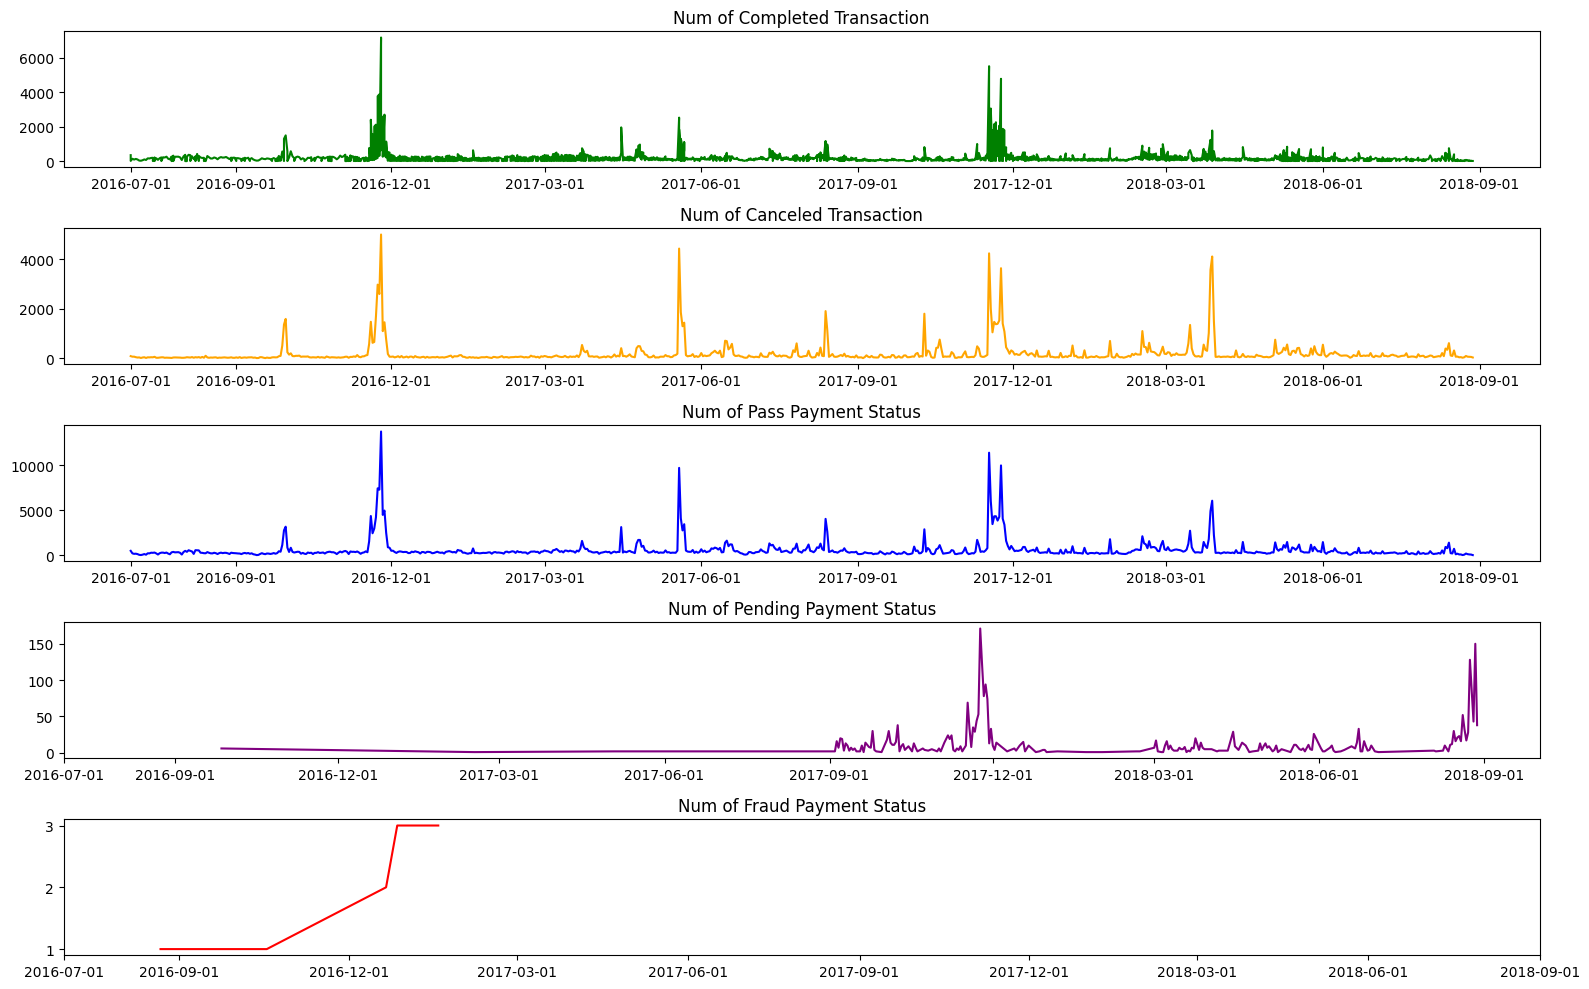

In [59]:
xtick = ['2016-07','2016-09','2016-12','2017-03','2017-06','2017-09','2017-12','2018-03','2018-06','2018-09']
f,ax = plt.subplots(5,1,figsize=(16,10))
tmp2 = tmp[tmp.status.isin(['complete','paid','received'])]
ax[0].plot(tmp2.index, tmp2['count'], color='green')
ax[0].set_title('Num of Completed Transaction')
ax[0].set_xticks(xtick)
tmp2 = tmp[tmp.status.isin(['canceled'])]
ax[1].plot(tmp2.index, tmp2['count'], color='orange')
ax[1].set_title('Num of Canceled Transaction')
ax[1].set_xticks(xtick)
tmp2 = tmp1[tmp1.payment_status.isin(['pass'])]
ax[2].plot(tmp2.index, tmp2['count'], color='blue')
ax[2].set_title('Num of Pass Payment Status')
ax[2].set_xticks(xtick)
tmp2 = tmp1[tmp1.payment_status.isin(['pending'])]
ax[3].plot(tmp2.index, tmp2['count'], color='purple')
ax[3].set_title('Num of Pending Payment Status')
ax[3].set_xticks(xtick)
tmp2 = tmp1[tmp1.payment_status.isin(['fraud'])]
ax[4].plot(tmp2.index, tmp2['count'], color='red')
ax[4].set_title('Num of Fraud Payment Status')
ax[4].set_xticks(xtick)
plt.tight_layout()
plt.show()

## Problem 1: Forecasting Sales Data

### Define Feature Data

In [65]:
# dataset timeseries total revenue by day
train_df0 = df.filter(df.status.isin(['complete','paid','received'])).groupBy('created_at').sum('grand_total').sort('created_at').toPandas()

# # dataset timeseries total success order by day
# train_df1 = df.filter(df.status.isin(['complete','paid','received'])).groupBy('created_at').count().sort('created_at').toPandas()

In [66]:
train_df0.rename(columns={'created_at':'ds','sum(grand_total)':'y'}, inplace=True)
# train_df1.rename(columns={'created_at':'ds','count':'y'}, inplace=True)

### Forecast Model Training

In [67]:
from prophet import Prophet

c:\Users\dendy\miniconda3\envs\airflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [68]:
# revenue forecast model
m0 = Prophet()
m0.fit(train_df0)

15:18:25 - cmdstanpy - INFO - Chain [1] start processing
15:18:25 - cmdstanpy - INFO - Chain [1] done processing


In [70]:
# # order forecast model
# m1 = Prophet()
# m1.fit(train_df1)

In [71]:
# forecasting up to 1 year
future0 = m0.make_future_dataframe(periods=365)
# future0.tail(4)

# future1 = m1.make_future_dataframe(periods=365)
# # future1.tail(4)

In [72]:
forecast = m0.predict(future0)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1148,2019-08-24,-509513.847054,-2.857675e+06,1.641950e+06
1149,2019-08-25,-719589.117938,-3.133009e+06,1.401828e+06
1150,2019-08-26,-571700.917262,-2.793303e+06,1.642512e+06
1151,2019-08-27,-609602.642981,-2.711387e+06,1.598944e+06
1152,2019-08-28,-681747.229770,-3.009502e+06,1.465551e+06


In [73]:
# forecast1 = m1.predict(future1)
# forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

c:\Users\dendy\miniconda3\envs\airflow\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dendy\miniconda3\envs\airflow\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


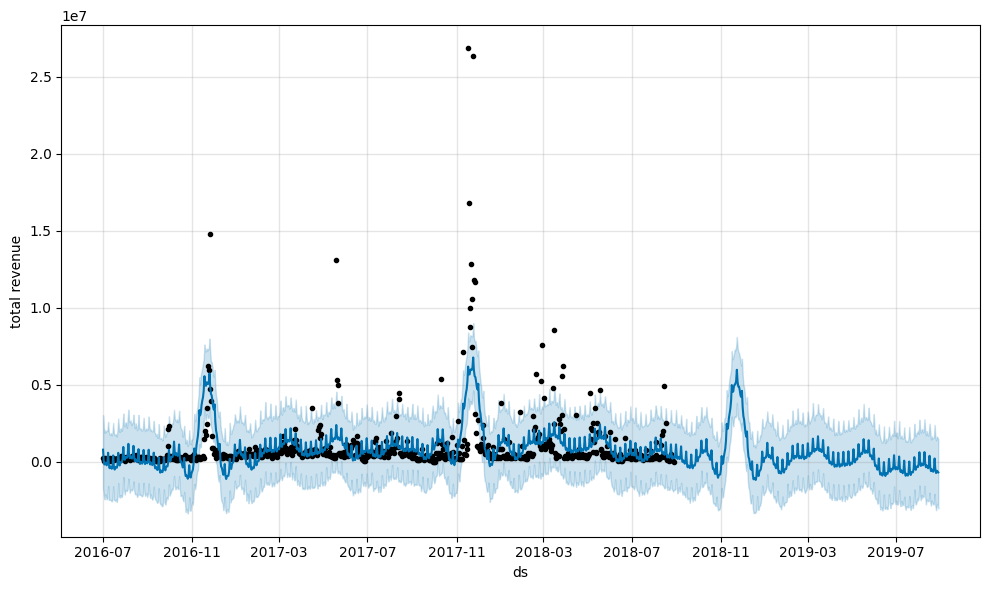

In [74]:
ax = m0.plot(forecast, ylabel='total revenue')

In [75]:
# ax = m1.plot(forecast, ylabel='total order')

### Hyperparameter Tuning

In [81]:
import itertools
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [84]:
param_grid = {  
    'changepoint_prior_scale': [1e-3,0.01, 0.1, 0.5],
    'seasonality_prior_scale': [1e-3,0.1, 1.0, 10.0],
}

# generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# cross validation model to evaluate all parameters
for params in all_params:
    m0 = Prophet(**params).fit(train_df0)
    df_cv = cross_validation(m0, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

15:23:27 - cmdstanpy - INFO - Chain [1] start processing
15:23:28 - cmdstanpy - INFO - Chain [1] done processing
15:23:31 - cmdstanpy - INFO - Chain [1] start processing
15:23:31 - cmdstanpy - INFO - Chain [1] done processing
15:23:35 - cmdstanpy - INFO - Chain [1] start processing
15:23:35 - cmdstanpy - INFO - Chain [1] done processing
15:23:39 - cmdstanpy - INFO - Chain [1] start processing
15:23:39 - cmdstanpy - INFO - Chain [1] done processing
15:23:43 - cmdstanpy - INFO - Chain [1] start processing
15:23:43 - cmdstanpy - INFO - Chain [1] done processing
15:23:47 - cmdstanpy - INFO - Chain [1] start processing
15:23:47 - cmdstanpy - INFO - Chain [1] done processing
15:23:51 - cmdstanpy - INFO - Chain [1] start processing
15:23:51 - cmdstanpy - INFO - Chain [1] done processing
15:23:55 - cmdstanpy - INFO - Chain [1] start processing
15:23:55 - cmdstanpy - INFO - Chain [1] done processing
15:24:00 - cmdstanpy - INFO - Chain [1] start processing
15:24:00 - cmdstanpy - INFO - Chain [1]

    changepoint_prior_scale  seasonality_prior_scale          rmse
0                     0.001                    0.001  2.642523e+06
1                     0.001                    0.100  2.370918e+06
2                     0.001                    1.000  2.370474e+06
3                     0.001                   10.000  2.370507e+06
4                     0.010                    0.001  2.684467e+06
5                     0.010                    0.100  2.404575e+06
6                     0.010                    1.000  2.404126e+06
7                     0.010                   10.000  2.404526e+06
8                     0.100                    0.001  2.850140e+06
9                     0.100                    0.100  2.435386e+06
10                    0.100                    1.000  2.431265e+06
11                    0.100                   10.000  2.432181e+06
12                    0.500                    0.001  3.000371e+06
13                    0.500                    0.100  2.628497

Based on test above we can get best param for our forecast model with changepoint_prior_scale = 1e-3 and seasonality_prior_scale = 1.

### Model Evaluate

In [86]:
m0 = m0 = Prophet(changepoint_prior_scale=1e-3, seasonality_prior_scale=1).fit(train_df0)
cv = cross_validation(m0, horizon = '30 days', parallel="processes")
df_p = performance_metrics(cv)
df_p

15:30:32 - cmdstanpy - INFO - Chain [1] start processing
15:30:32 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.066656e+13,3.265971e+06,1.269447e+06,1.528817,0.784501,0.826345,0.913889
1,4 days,4.292733e+12,2.071891e+06,1.027010e+06,1.609727,0.781529,0.811557,0.926389
2,5 days,3.378289e+12,1.838012e+06,1.024156e+06,1.546770,0.949025,0.825742,0.925463
3,6 days,3.102128e+12,1.761286e+06,9.807955e+05,1.576985,0.910371,0.822406,0.925926
4,7 days,3.003895e+12,1.733175e+06,9.559501e+05,1.552215,0.846326,0.813671,0.926389
5,8 days,8.051101e+12,2.837446e+06,1.106873e+06,1.588128,0.814466,0.829893,0.937963
6,9 days,9.059265e+12,3.009861e+06,1.218055e+06,1.435750,0.802429,0.820266,0.913426
7,10 days,9.184187e+12,3.030542e+06,1.211314e+06,1.312474,0.793231,0.763310,0.913426
8,11 days,3.136628e+12,1.771053e+06,9.639520e+05,1.281975,0.776575,0.733410,0.913889
9,12 days,2.567960e+12,1.602486e+06,9.657937e+05,2.202419,0.981661,0.808360,0.900926


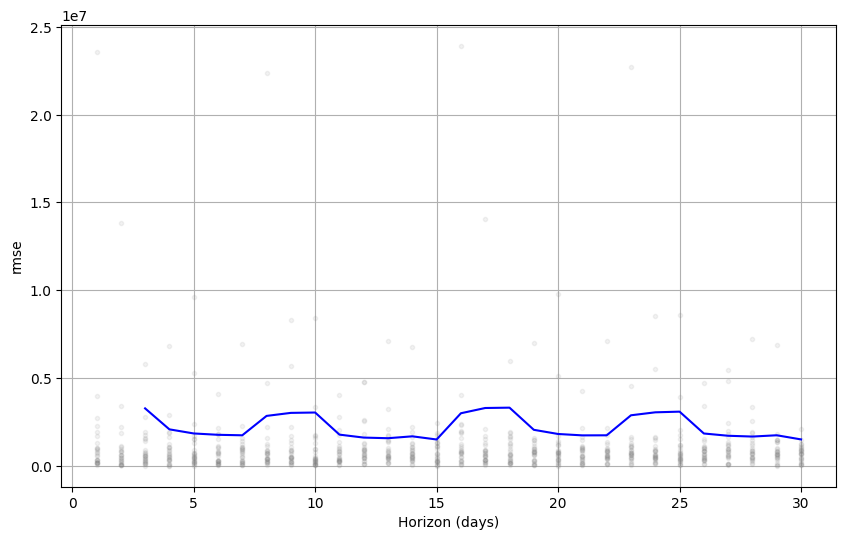

In [87]:
fig = plot_cross_validation_metric(cv, metric='rmse')

## Problem 2: Classify Payment Status

### Define Train Data

In [88]:
# df.show(5)

+-------+--------------+----------+------+-----------+-----------+-----------------+--------------+---------+--------------+-----------+--------------+-------------+
|item_id|        status|created_at| price|qty_ordered|grand_total|         category|payment_method|bi_status|customer_since|customer_id|payment_status|is_discounted|
+-------+--------------+----------+------+-----------+-----------+-----------------+--------------+---------+--------------+-----------+--------------+-------------+
| 211510|      complete|2016-07-01| 120.0|          1|      360.0|Beauty & Grooming|           cod|      Net|    2016-07-01|         13|          pass|            0|
| 212050|      complete|2016-07-02|6240.0|          1|        0.0|       Appliances| productcredit|      Net|    2016-07-01|        271|          pass|            0|
| 212104|order_refunded|2016-07-03|6700.0|          1|     6700.0|Mobiles & Tablets|           cod|    Valid|    2016-07-01|        321|          pass|            0|
| 21

In [89]:
train_df2 = df.select('created_at','item_id','category','qty_ordered','is_discounted','grand_total','payment_method','bi_status','payment_status','customer_id','customer_since')

In [90]:
train_df2.show(5)

+----------+-------+-----------------+-----------+-------------+-----------+--------------+---------+--------------+-----------+--------------+
|created_at|item_id|         category|qty_ordered|is_discounted|grand_total|payment_method|bi_status|payment_status|customer_id|customer_since|
+----------+-------+-----------------+-----------+-------------+-----------+--------------+---------+--------------+-----------+--------------+
|2016-07-01| 211510|Beauty & Grooming|          1|            0|      360.0|           cod|      Net|          pass|         13|    2016-07-01|
|2016-07-02| 212050|       Appliances|          1|            0|        0.0| productcredit|      Net|          pass|        271|    2016-07-01|
|2016-07-03| 212104|Mobiles & Tablets|          1|            0|     6700.0|           cod|    Valid|          pass|        321|    2016-07-01|
|2016-07-03| 212183|          Soghaat|          1|            0|       90.0|           cod|      Net|          pass|        341|    2016

### Preprocessing Data

In [91]:
# convert date type data to unix timestamp
train_df2 = train_df2.withColumn('created_at',F.unix_date('created_at'))
train_df2 = train_df2.withColumn('customer_since',F.unix_date('customer_since'))

In [92]:
# encode categorical data
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler


In [93]:
input_col = ['created_at','category','payment_method', 'bi_status', 'customer_since']

In [95]:
output_col = [c+'_idx' for c in input_col]
indexer = StringIndexer(inputCols=input_col, outputCols=output_col).setHandleInvalid("skip")

In [96]:
idx_col = [c+'_idx' for c in input_col] + ['is_discounted']
output_col = [c+'_dummy' for c in input_col] + ['is_discounted_dummy']
ohe = OneHotEncoder(inputCols=idx_col, outputCols=output_col)

In [97]:
feature_col = ['qty_ordered','grand_total','is_discounted_dummy'] + [c+'_dummy' for c in input_col if c != 'payment_status']
assembler = VectorAssembler(inputCols=feature_col, outputCol='features')

### Split Data

In [98]:
# define target column
train_df2 = train_df2.withColumn('label', F.when(train_df2.payment_status == 'pass', 0)
                                        .when(train_df2.payment_status == 'pending', 1)
                                        .otherwise(2)
                                    )

In [99]:

# split dataframes by payment_status
tmp = train_df2.filter(train_df2['label']==0)
tmp1 = train_df2.filter(train_df2['label']==1)
tmp2 = train_df2.filter(train_df2['label']==2)

# split datasets into training and testing
train0, test0 = tmp.randomSplit([0.8,0.2], seed=1)
train1, test1 = tmp1.randomSplit([0.8,0.2], seed=1)
train2, test2 = tmp2.randomSplit([0.7,0.3], seed=1)
# stack datasets back together
X_train = train0.union(train1)
X_train = X_train.union(train2)
X_test = test0.union(test1)
X_test = X_test.union(test2)

print(X_train.count())
print(X_test.count())

396764
98896


In [100]:
X_train.groupBy('label').count().show()
X_test.groupBy('label').count().show()

+-----+------+
|label| count|
+-----+------+
|    0|394488|
|    1|  2268|
|    2|     8|
+-----+------+

+-----+-----+
|label|count|
+-----+-----+
|    0|98337|
|    1|  557|
|    2|    2|
+-----+-----+



### Find Best Model

In [101]:
from pyspark.ml.classification import DecisionTreeClassifier, GBTClassifier, RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

In [102]:
# default Decision Tree Classifier model
est = DecisionTreeClassifier()
pipe = Pipeline(stages=[indexer, ohe, assembler, est])
params = ParamGridBuilder().build()
eval = MulticlassClassificationEvaluator()
cv = CrossValidator(estimator=pipe, estimatorParamMaps=params, evaluator=eval, numFolds=3, seed=1)

In [103]:
cv = cv.fit(X_train)
# avg F1 Score for best model
cv.avgMetrics

[0.9928835998242135]

In [104]:
# default Random Forest Classifier model
est = RandomForestClassifier()
pipe = Pipeline(stages=[indexer, ohe, assembler, est])
params = ParamGridBuilder().build()
eval = MulticlassClassificationEvaluator()
cv = CrossValidator(estimator=pipe, estimatorParamMaps=params, evaluator=eval, numFolds=3, seed=1)

In [105]:
cv = cv.fit(X_train)
# avg F1 Score for best model
cv.avgMetrics

[0.9914036627072395]

Based on initial test above we can see that Decision Tree model have slightly higher accuracy than Random Forest model. It's because the Random Forest model use several tree model to predict, resulting in accuracy values that represent the average across all trees. <br><br>

Even though Random Forest have lower score, it's a stronger choice because it combines the results of many trees so we can avoid overfitting. So we will choose this model instead.

### Best Model Evaluation

In [117]:
pred = cv.transform(X_test)
print(eval.evaluate(pred, {eval.metricName: 'weightedPrecision'}))
print(eval.evaluate(pred, {eval.metricName: 'weightedRecall'}))

0.9887271446065649
0.9943475974761365


It can be concluded that Random Forest model can classify payment statusvery well with F1, Precision, and Recall scores of 0.991, 0.988, and 0.994, respectively. <br><br>
